Ex1

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
tmp_df = []
with open("Data_EX1.txt", 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        tmp_df.append(line[5:-1].split("  "))
df = pd.DataFrame(tmp_df)
del tmp_df
for i in range(12):
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].replace(99.0, np.nan)
    df[i] = df[i].replace(-99.0, np.nan)



In [16]:
time_range = range(df.shape[1])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]
# mean of each month
month_mean = [np.nanmean(df[x].to_numpy()) for x in range(12)]
# range of each month
month_min = [np.nanmin(df[x]) for x in range(12)]
month_max = [np.nanmax(df[x]) for x in range(12)]

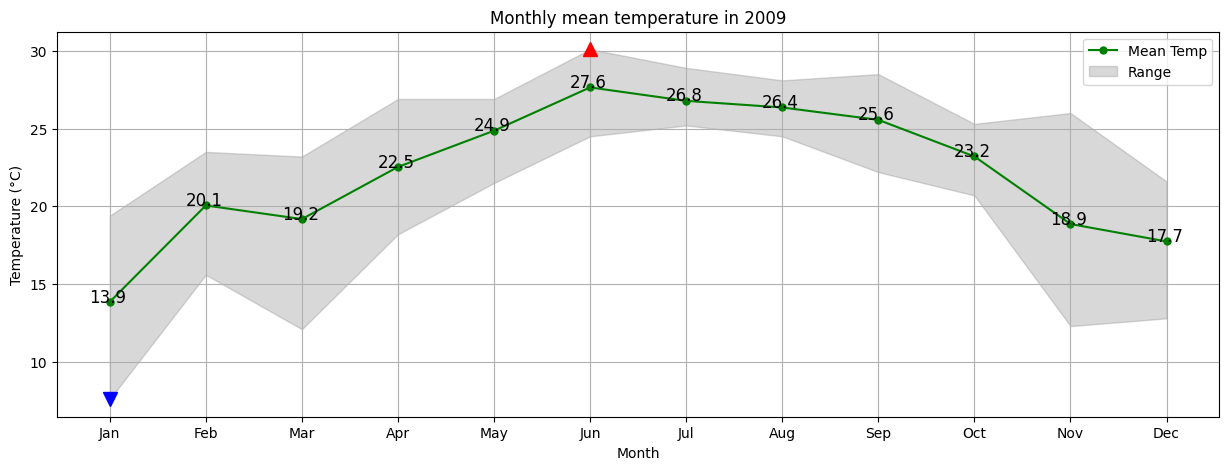

In [17]:
# plot
plt.figure(figsize=(15,5))

#middle line
plt.plot(time_range,month_mean, marker='.', markersize=10, linestyle='solid', color="green", label="Mean Temp")
# plt.scatter(time_range, month_mean, color='green', label='dots', zorder=3)
# Add text labels next to the points
for i in range(len(time_range)):
    plt.text(time_range[i] - 0.21, month_mean[i], str(np.round(month_mean[i],1)), fontsize=12)
# range
plt.plot(time_range,month_min, linestyle='solid', alpha=0)
plt.plot(time_range,month_max, linestyle='solid', alpha=0)
plt.fill_between(time_range, month_max, month_min, color='gray', alpha=0.3, label='Range')
# min max
plt.plot(time_range[5], month_max[5], marker='^', markersize=10, color='red')
plt.plot(time_range[0], month_min[0], marker='v', markersize=10, color='blue')
# other 
plt.legend()
plt.xticks(time_range, months)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly mean temperature in 2009")
plt.grid()

Ex2


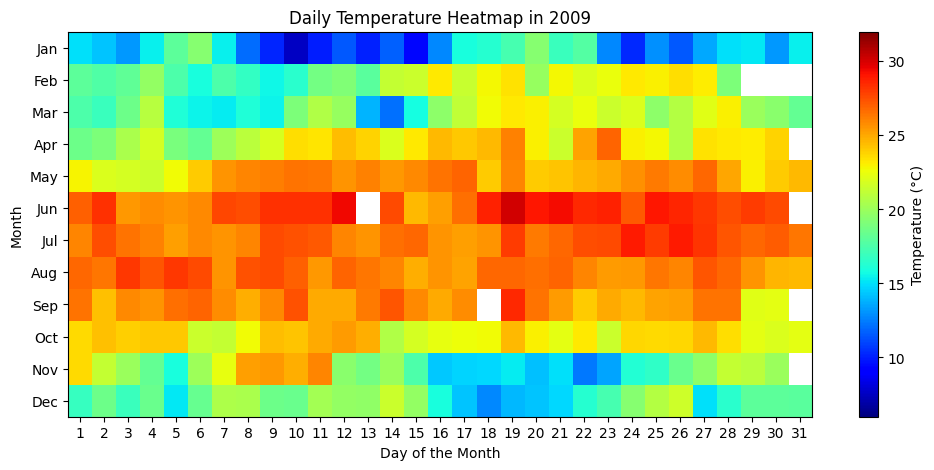

In [18]:
df.drop([31,32,33,34,35,36], axis='index', inplace=True)

# Prepare a matrix for the heatmap
heatmap_data = df.to_numpy()

# Creating the correct heatmap as per the user's provided image
plt.figure(figsize=(12, 5))
plt.imshow(heatmap_data.T, aspect='auto', cmap='jet', interpolation='nearest', vmin=6, vmax=32)

# Adding color bar for temperature
plt.colorbar(label="Temperature (°C)")

# Adjusting the ticks and labels
plt.xticks(np.arange(31), np.arange(1, 32))
plt.yticks(np.arange(12), months)
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.title('Daily Temperature Heatmap in 2009')

plt.show()


Ex3:

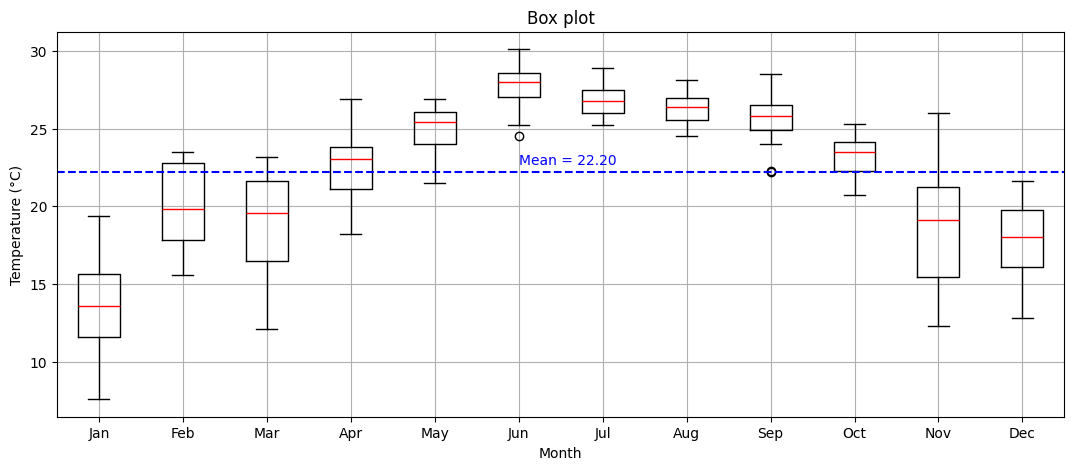

In [19]:
# Recreating the boxplot with no color fill for the boxes
data_by_month = [df[i].dropna().tolist() for i in df.columns]
annual_mean = np.nanmean(df.values)
plt.figure(figsize=(13,5))
plt.boxplot(data_by_month, patch_artist=False, 
            medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Plotting the annual mean as a horizontal line
plt.axhline(annual_mean, color='blue', linestyle='--', label=f'Mean = {annual_mean:.2f}')
plt.text(6, annual_mean + 0.5, f'Mean = {annual_mean:.2f}', color='blue')

# Adding labels and title
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Box plot')


# Display the plot
plt.grid(True)
plt.show()


Ex4:

In [20]:
!pip install xarray netCDF4 geopandas matplotlib cartopy



   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------- -------------- 0.8/1.2 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------- -------------------------------- 1.3/7.0 MB 7.4 MB/s eta 0:00:01
   ------------------- -------------------- 3.4/7.0 MB 9.0 MB/s eta 0:00:01
   ---------------------------------- ----- 6.0/7.0 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 11.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 11.6 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 11.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 11.6 MB/s eta 0:00:01
   -------------------

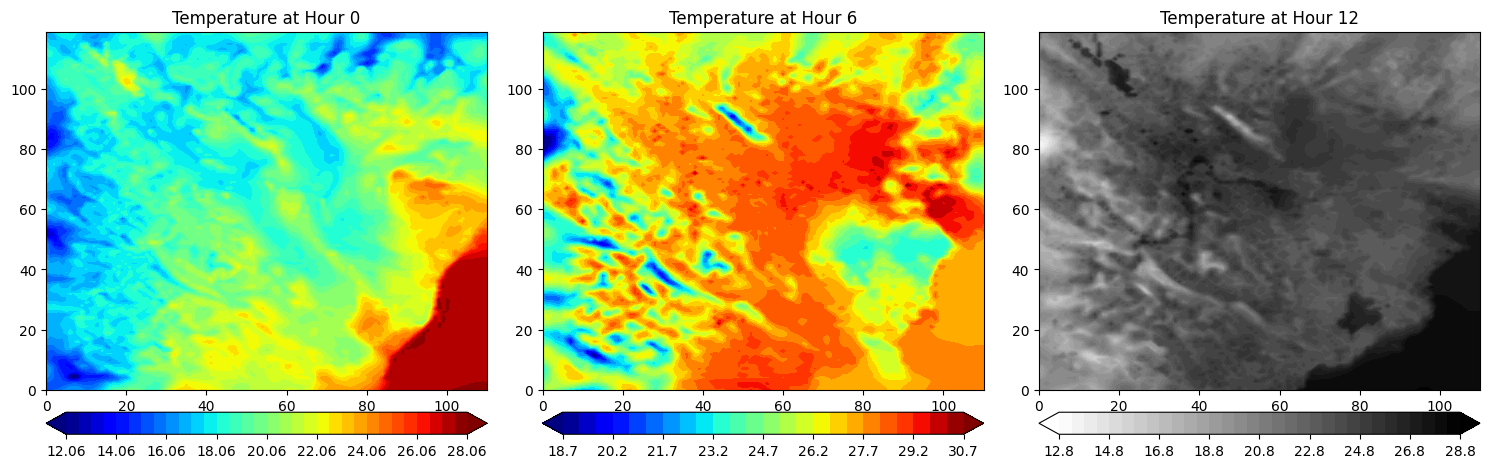

In [21]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the NetCDF file and GADM shapefile for Vietnam
netcdf_path = 'wrfout_d02_2019-11-12_sample.nc'
shapefile_path = 'gadm41_VNM_1.shp'

# Load NetCDF data
data = xr.open_dataset(netcdf_path)

# Extract temperature variable 'T2'
temperature = data['T2']

# Load the GADM shapefile for Vietnam and filter for Hanoi
# Uncomment this after resolving the geometry issue
# vietnam_with_geom = gpd.read_file(shapefile_path)
# hanoi = vietnam_with_geom[vietnam_with_geom['NAME_1'] == 'Hà Nội']

# Define the hours to plot
hours_to_plot = [0, 6, 12]
colormaps = ['jet', 'jet', 'binary']
temperature_step = 0.5  # temperature step for color bars

# Plot the maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, hour in enumerate(hours_to_plot):
    ax = axes[idx]
    temp_data = temperature.isel(XTIME=hour).values - 273.15  # Convert from Kelvin to Celsius
    levels = np.arange(temp_data.min(), temp_data.max() + temperature_step, temperature_step)
    
    # Plot temperature map
    contour = ax.contourf(temp_data, levels=levels, cmap=colormaps[idx], extend='both')
    plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
    
    # Uncomment the following to plot Hanoi boundary after resolving geometry issues
    # hanoi.boundary.plot(ax=ax, linewidth=1, color="white")
    
    # Set title
    ax.set_title(f'Temperature at Hour {hour}')

plt.tight_layout()
plt.show()

Ex5:

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import *
from netCDF4 import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import scipy.stats as stats

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
data=xr.open_dataset("sst.nc")

def calculate_nino34(data):    
    sst_nino34=data.sst.sel(lat=slice(-5,5),lon=slice(190,240))
    tmp=sst_nino34.groupby('time.month')
    tmp1=tmp-tmp.mean(dim="time")
    index_nino34=tmp1.mean(dim=["lat","lon"])

    return index_nino34

index_nino34 = calculate_nino34(data)

In [ ]:
plt.plot(index_nino34, 'k')
# Draw the dashed horizontal line at y=1 and y=-1
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=-1, color='gray', linestyle='--')
# Fill color
plt.fill_between(np.linspace(0,504,504),index_nino34, 1, where=(index_nino34 > 1), color='red', alpha=0.5)
plt.fill_between(np.linspace(0,504,504),index_nino34, -1, where=(index_nino34 < -1), color='blue', alpha=0.5)

# Year | start at sep 1981 and end at august 2023
x_ticks = np.arange(-21, 520, 5*12)
plt.xticks(x_ticks, [f"{1980 + i}" for i in range(0,46,5)])
plt.show()

5.2

In [ ]:
plt.plot(index_nino34, 'k')
# Draw the dashed horizontal line at y=1 and y=-1
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=-1, color='gray', linestyle='--')
# Fill color
plt.fill_between(np.linspace(0,504,504),index_nino34, 1, where=(index_nino34 > 1), color='red', alpha=0.5)
plt.fill_between(np.linspace(0,504,504),index_nino34, -1, where=(index_nino34 < -1), color='blue', alpha=0.5)

# Year | start at sep 1981 and end at august 2023
x_ticks = np.arange(-21, 520, 5*12)
plt.xticks(x_ticks, [f"{1980 + i}" for i in range(0,46,5)])
plt.show()